## Multiple_Linear_Regression

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [48]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

In [49]:
dataset.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
25,64664.71,139553.16,137962.62,California,107404.34
39,38558.51,82982.09,174999.30,California,81005.76
44,22177.74,154806.14,28334.72,California,65200.33
36,28663.76,127056.21,201126.82,Florida,90708.19
21,78389.47,153773.43,299737.29,New York,111313.02
13,91992.39,135495.07,252664.93,California,134307.35
35,46014.02,85047.44,205517.64,New York,96479.51
30,61994.48,115641.28,91131.24,Florida,99937.59
4,142107.34,91391.77,366168.42,Florida,166187.94
47,0.00,135426.92,0.00,California,42559.73


In [50]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [64]:
dataset.corr()[['Profit']]

,Profit
R&D Spend,0.972900
Administration,0.200717
Marketing Spend,0.747766
Profit,1.000000


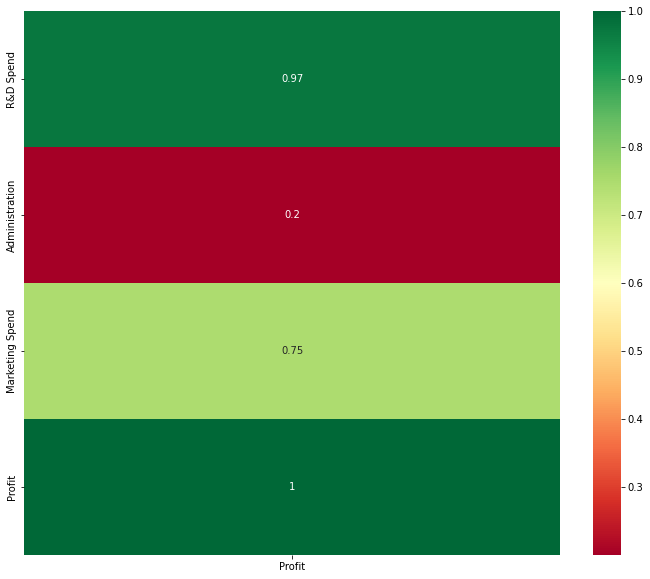

In [65]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr()[['Profit']], annot=True,cmap ='RdYlGn')
plt.show()

In [66]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [67]:
states=pd.get_dummies(X['State'],drop_first=True)

In [68]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [58]:
X=X.drop('State',axis=1)
X=pd.concat([X,states],axis=1)

In [59]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


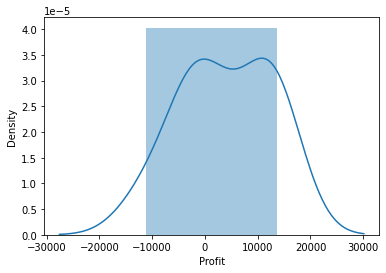

In [72]:
sns.distplot(y_test-y_pred)
plt.show()

In [76]:
y_test.values

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [78]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [83]:
regressor.score(X_test, y_test)

0.9347068473282423

In [63]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9347068473282423